In [2]:
#libraries - basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import tensorflow as tf
import nltk

In [7]:
#Fully balancing train/test sets using undersampling and trying the models again

In [8]:
#spliting the ds for models
from sklearn.model_selection import train_test_split

In [4]:
#train, test = train_test_split(df, test_size=0.30, random_state=7, shuffle=False)

In [6]:
#train['y_lbl'].value_counts()
#75 to 25% labels - a balanced ds in terms of NLP

0    51526
1    17156
Name: y_lbl, dtype: int64

In [12]:
#pkl the test-train sets
x_train.to_pickle('x_train.pkl')
x_test.to_pickle('x_test.pkl')
y_train.to_pickle('y_train.pkl')
y_test.to_pickle('y_test.pkl')

In [4]:
#read pickled sets
x_train = pd.read_pickle('x_train.pkl')
x_test = pd.read_pickle('x_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')

In [15]:
#Balancing the dataset with undersampling:
from imblearn.under_sampling import RandomUnderSampler

In [16]:
# define undersample strategy
rus = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = rus.fit_resample(x_train, y_train)

In [17]:
print(y_train.value_counts(), y_under.value_counts())

0    51526
1    17156
Name: y_lbl, dtype: int64 0    17156
1    17156
Name: y_lbl, dtype: int64


In [18]:
X_under.to_pickle('X_under.pkl') 
y_under.to_pickle('y_under.pkl') 

In [3]:
X_under=pd.read_pickle('X_under.pkl') 
y_under=pd.read_pickle('y_under.pkl') 

In [5]:
#cluster centroids
from imblearn.under_sampling import ClusterCentroids
undersampler = ClusterCentroids()

In [ ]:
X_smote, y_smote = undersampler.fit_resample(x_train, y_train)

C:\Users\sofnl\anaconda3\envs\gpu2\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_train.value_counts(), y_smote.value_counts())

In [ ]:
#trying ML models

In [3]:
#importing prebuilt metrics 
# Import modules to evaluate the metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc

In [4]:
import matplotlib.pyplot as plt

In [5]:
#custom metrics
# Create the confussion matrix
def plot_confussion_matrix(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()
    
# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [12]:
#RandomForestClassifier with 300 estimators
from sklearn.ensemble import RandomForestClassifier

In [13]:
# create the model, train it, print scores
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_under, y_under)

RandomForestClassifier(n_estimators=200)

In [14]:
print("train score:", clf.score(x_train, y_train))
print("test score:", clf.score(x_test, y_test))

train score: 0.7251390466206575
test score: 0.7016918059518956


In [15]:
# Predicting the Test set results
y_pred = clf.predict(x_test)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80     24146
           1       0.33      0.63      0.43      5290

    accuracy                           0.70     29436
   macro avg       0.61      0.67      0.61     29436
weighted avg       0.80      0.70      0.73     29436



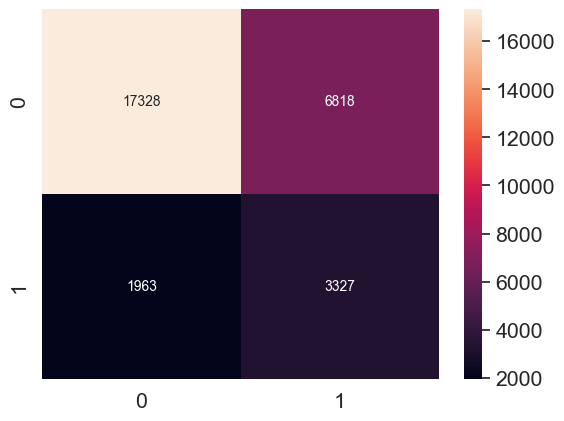

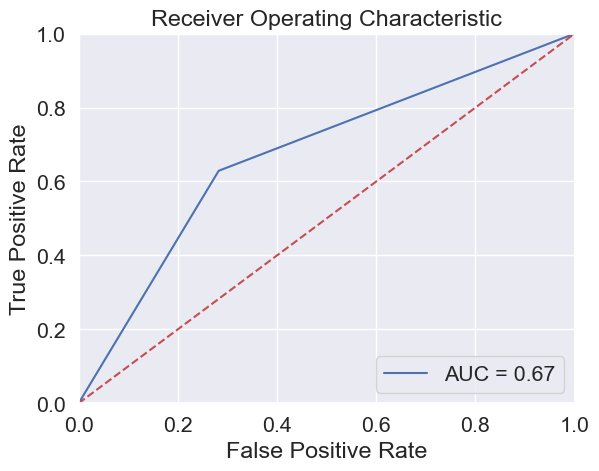

In [16]:
print(metrics.classification_report(y_test, y_pred))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

In [7]:
##XGBoost! Which is the best for sparse data
from lightgbm import LGBMClassifier
#f1 is balancing the recall and precision on positives
from sklearn.metrics import f1_score

In [8]:
def f1_metric(ytrue,preds):
    ''' Return the F1 Score value for the preds and true values, ytrue '''
    return 'f1_score', f1_score((preds>=0.5).astype('int'), ytrue, average='macro'), True

params = {
    'learning_rate': 0.06,
    'n_estimators': 1500,
    'colsample_bytree': 0.5,
    'metric': 'f1_score'
}

full_clf = LGBMClassifier(**params)

In [13]:
# Fit or train the xgboost model
full_clf.fit(X_under, y_under, eval_set=[(X_under, y_under), (x_test, y_test)],
             eval_metric=f1_metric)

[1]	training's f1_score: 0.51907	valid_1's f1_score: 0.433571
[2]	training's f1_score: 0.54003	valid_1's f1_score: 0.458546
[3]	training's f1_score: 0.652862	valid_1's f1_score: 0.547147
[4]	training's f1_score: 0.662185	valid_1's f1_score: 0.560464
[5]	training's f1_score: 0.663855	valid_1's f1_score: 0.564622
[6]	training's f1_score: 0.661386	valid_1's f1_score: 0.557204
[7]	training's f1_score: 0.664269	valid_1's f1_score: 0.562023
[8]	training's f1_score: 0.664178	valid_1's f1_score: 0.561624
[9]	training's f1_score: 0.665747	valid_1's f1_score: 0.5636
[10]	training's f1_score: 0.666369	valid_1's f1_score: 0.564687
[11]	training's f1_score: 0.665621	valid_1's f1_score: 0.56281
[12]	training's f1_score: 0.667194	valid_1's f1_score: 0.565046
[13]	training's f1_score: 0.668501	valid_1's f1_score: 0.566939
[14]	training's f1_score: 0.669123	valid_1's f1_score: 0.567161
[15]	training's f1_score: 0.66943	valid_1's f1_score: 0.568129
[16]	training's f1_score: 0.668958	valid_1's f1_score: 

[135]	training's f1_score: 0.694419	valid_1's f1_score: 0.595709
[136]	training's f1_score: 0.694462	valid_1's f1_score: 0.596227
[137]	training's f1_score: 0.694662	valid_1's f1_score: 0.596173
[138]	training's f1_score: 0.69483	valid_1's f1_score: 0.596529
[139]	training's f1_score: 0.694938	valid_1's f1_score: 0.596885
[140]	training's f1_score: 0.695089	valid_1's f1_score: 0.597157
[141]	training's f1_score: 0.695241	valid_1's f1_score: 0.59743
[142]	training's f1_score: 0.695419	valid_1's f1_score: 0.597346
[143]	training's f1_score: 0.695355	valid_1's f1_score: 0.597592
[144]	training's f1_score: 0.695387	valid_1's f1_score: 0.597509
[145]	training's f1_score: 0.695485	valid_1's f1_score: 0.597235
[146]	training's f1_score: 0.69549	valid_1's f1_score: 0.597401
[147]	training's f1_score: 0.695512	valid_1's f1_score: 0.597648
[148]	training's f1_score: 0.69549	valid_1's f1_score: 0.597729
[149]	training's f1_score: 0.69563	valid_1's f1_score: 0.598111
[150]	training's f1_score: 0.6

[264]	training's f1_score: 0.70388	valid_1's f1_score: 0.6028
[265]	training's f1_score: 0.703912	valid_1's f1_score: 0.602773
[266]	training's f1_score: 0.703835	valid_1's f1_score: 0.602688
[267]	training's f1_score: 0.703766	valid_1's f1_score: 0.602855
[268]	training's f1_score: 0.703922	valid_1's f1_score: 0.602855
[269]	training's f1_score: 0.704091	valid_1's f1_score: 0.602601
[270]	training's f1_score: 0.704151	valid_1's f1_score: 0.602656
[271]	training's f1_score: 0.704183	valid_1's f1_score: 0.602545
[272]	training's f1_score: 0.704261	valid_1's f1_score: 0.602596
[273]	training's f1_score: 0.704169	valid_1's f1_score: 0.602653
[274]	training's f1_score: 0.704251	valid_1's f1_score: 0.602709
[275]	training's f1_score: 0.704357	valid_1's f1_score: 0.602761
[276]	training's f1_score: 0.704411	valid_1's f1_score: 0.60268
[277]	training's f1_score: 0.70448	valid_1's f1_score: 0.602706
[278]	training's f1_score: 0.704485	valid_1's f1_score: 0.602872
[279]	training's f1_score: 0.7

[393]	training's f1_score: 0.70729	valid_1's f1_score: 0.605286
[394]	training's f1_score: 0.707298	valid_1's f1_score: 0.605203
[395]	training's f1_score: 0.707294	valid_1's f1_score: 0.605148
[396]	training's f1_score: 0.707326	valid_1's f1_score: 0.605117
[397]	training's f1_score: 0.707193	valid_1's f1_score: 0.605196
[398]	training's f1_score: 0.70717	valid_1's f1_score: 0.605279
[399]	training's f1_score: 0.707257	valid_1's f1_score: 0.605083
[400]	training's f1_score: 0.707252	valid_1's f1_score: 0.605281
[401]	training's f1_score: 0.707284	valid_1's f1_score: 0.605363
[402]	training's f1_score: 0.707303	valid_1's f1_score: 0.605391
[403]	training's f1_score: 0.707307	valid_1's f1_score: 0.605336
[404]	training's f1_score: 0.707339	valid_1's f1_score: 0.605281
[405]	training's f1_score: 0.707375	valid_1's f1_score: 0.605337
[406]	training's f1_score: 0.707312	valid_1's f1_score: 0.605391
[407]	training's f1_score: 0.707284	valid_1's f1_score: 0.605363
[408]	training's f1_score: 

[522]	training's f1_score: 0.70908	valid_1's f1_score: 0.606452
[523]	training's f1_score: 0.709076	valid_1's f1_score: 0.606482
[524]	training's f1_score: 0.708985	valid_1's f1_score: 0.606482
[525]	training's f1_score: 0.708981	valid_1's f1_score: 0.606565
[526]	training's f1_score: 0.709099	valid_1's f1_score: 0.606454
[527]	training's f1_score: 0.709126	valid_1's f1_score: 0.60637
[528]	training's f1_score: 0.709217	valid_1's f1_score: 0.606397
[529]	training's f1_score: 0.709277	valid_1's f1_score: 0.606427
[530]	training's f1_score: 0.709277	valid_1's f1_score: 0.606537
[531]	training's f1_score: 0.709578	valid_1's f1_score: 0.606413
[532]	training's f1_score: 0.70955	valid_1's f1_score: 0.606445
[533]	training's f1_score: 0.709455	valid_1's f1_score: 0.606415
[534]	training's f1_score: 0.709519	valid_1's f1_score: 0.606358
[535]	training's f1_score: 0.709582	valid_1's f1_score: 0.60636
[536]	training's f1_score: 0.709555	valid_1's f1_score: 0.606191
[537]	training's f1_score: 0.

[651]	training's f1_score: 0.711359	valid_1's f1_score: 0.606582
[652]	training's f1_score: 0.711355	valid_1's f1_score: 0.606527
[653]	training's f1_score: 0.711355	valid_1's f1_score: 0.606495
[654]	training's f1_score: 0.71135	valid_1's f1_score: 0.606387
[655]	training's f1_score: 0.711295	valid_1's f1_score: 0.60647
[656]	training's f1_score: 0.711323	valid_1's f1_score: 0.60661
[657]	training's f1_score: 0.711268	valid_1's f1_score: 0.606523
[658]	training's f1_score: 0.711245	valid_1's f1_score: 0.606408
[659]	training's f1_score: 0.711331	valid_1's f1_score: 0.606438
[660]	training's f1_score: 0.711386	valid_1's f1_score: 0.606411
[661]	training's f1_score: 0.711355	valid_1's f1_score: 0.606438
[662]	training's f1_score: 0.711272	valid_1's f1_score: 0.606523
[663]	training's f1_score: 0.711331	valid_1's f1_score: 0.606466
[664]	training's f1_score: 0.711194	valid_1's f1_score: 0.606546
[665]	training's f1_score: 0.711312	valid_1's f1_score: 0.606493
[666]	training's f1_score: 0

[781]	training's f1_score: 0.71299	valid_1's f1_score: 0.606379
[782]	training's f1_score: 0.712899	valid_1's f1_score: 0.606404
[783]	training's f1_score: 0.712923	valid_1's f1_score: 0.606461
[784]	training's f1_score: 0.712899	valid_1's f1_score: 0.606347
[785]	training's f1_score: 0.712935	valid_1's f1_score: 0.606264
[786]	training's f1_score: 0.712963	valid_1's f1_score: 0.606349
[787]	training's f1_score: 0.712848	valid_1's f1_score: 0.606487
[788]	training's f1_score: 0.712908	valid_1's f1_score: 0.606485
[789]	training's f1_score: 0.712908	valid_1's f1_score: 0.606372
[790]	training's f1_score: 0.712967	valid_1's f1_score: 0.606398
[791]	training's f1_score: 0.713022	valid_1's f1_score: 0.60648
[792]	training's f1_score: 0.713049	valid_1's f1_score: 0.606453
[793]	training's f1_score: 0.713022	valid_1's f1_score: 0.606565
[794]	training's f1_score: 0.713045	valid_1's f1_score: 0.60651
[795]	training's f1_score: 0.713037	valid_1's f1_score: 0.6064
[796]	training's f1_score: 0.7

[910]	training's f1_score: 0.714752	valid_1's f1_score: 0.60665
[911]	training's f1_score: 0.714724	valid_1's f1_score: 0.606459
[912]	training's f1_score: 0.714783	valid_1's f1_score: 0.6064
[913]	training's f1_score: 0.714755	valid_1's f1_score: 0.606455
[914]	training's f1_score: 0.714732	valid_1's f1_score: 0.606427
[915]	training's f1_score: 0.714724	valid_1's f1_score: 0.606567
[916]	training's f1_score: 0.714755	valid_1's f1_score: 0.606652
[917]	training's f1_score: 0.714724	valid_1's f1_score: 0.606709
[918]	training's f1_score: 0.714656	valid_1's f1_score: 0.606684
[919]	training's f1_score: 0.714661	valid_1's f1_score: 0.606798
[920]	training's f1_score: 0.714838	valid_1's f1_score: 0.606771
[921]	training's f1_score: 0.714874	valid_1's f1_score: 0.606771
[922]	training's f1_score: 0.714956	valid_1's f1_score: 0.606631
[923]	training's f1_score: 0.714996	valid_1's f1_score: 0.606626
[924]	training's f1_score: 0.715059	valid_1's f1_score: 0.606597
[925]	training's f1_score: 0

[1039]	training's f1_score: 0.716502	valid_1's f1_score: 0.606745
[1040]	training's f1_score: 0.716438	valid_1's f1_score: 0.6068
[1041]	training's f1_score: 0.716438	valid_1's f1_score: 0.606828
[1042]	training's f1_score: 0.716352	valid_1's f1_score: 0.606885
[1043]	training's f1_score: 0.716352	valid_1's f1_score: 0.606972
[1044]	training's f1_score: 0.716352	valid_1's f1_score: 0.606914
[1045]	training's f1_score: 0.716407	valid_1's f1_score: 0.60683
[1046]	training's f1_score: 0.716415	valid_1's f1_score: 0.606775
[1047]	training's f1_score: 0.716529	valid_1's f1_score: 0.606635
[1048]	training's f1_score: 0.716529	valid_1's f1_score: 0.606523
[1049]	training's f1_score: 0.716438	valid_1's f1_score: 0.606381
[1050]	training's f1_score: 0.716502	valid_1's f1_score: 0.606491
[1051]	training's f1_score: 0.716533	valid_1's f1_score: 0.606548
[1052]	training's f1_score: 0.716529	valid_1's f1_score: 0.606631
[1053]	training's f1_score: 0.71647	valid_1's f1_score: 0.606521
[1054]	trainin

[1168]	training's f1_score: 0.717737	valid_1's f1_score: 0.606679
[1169]	training's f1_score: 0.717819	valid_1's f1_score: 0.606732
[1170]	training's f1_score: 0.717819	valid_1's f1_score: 0.606787
[1171]	training's f1_score: 0.71772	valid_1's f1_score: 0.606709
[1172]	training's f1_score: 0.717851	valid_1's f1_score: 0.606815
[1173]	training's f1_score: 0.717827	valid_1's f1_score: 0.606872
[1174]	training's f1_score: 0.717827	valid_1's f1_score: 0.606898
[1175]	training's f1_score: 0.717827	valid_1's f1_score: 0.60676
[1176]	training's f1_score: 0.717764	valid_1's f1_score: 0.606732
[1177]	training's f1_score: 0.717831	valid_1's f1_score: 0.606563
[1178]	training's f1_score: 0.717859	valid_1's f1_score: 0.60659
[1179]	training's f1_score: 0.717705	valid_1's f1_score: 0.606563
[1180]	training's f1_score: 0.717618	valid_1's f1_score: 0.606478
[1181]	training's f1_score: 0.717559	valid_1's f1_score: 0.606563
[1182]	training's f1_score: 0.717559	valid_1's f1_score: 0.606317
[1183]	traini

[1295]	training's f1_score: 0.718888	valid_1's f1_score: 0.606118
[1296]	training's f1_score: 0.718912	valid_1's f1_score: 0.606233
[1297]	training's f1_score: 0.718888	valid_1's f1_score: 0.60634
[1298]	training's f1_score: 0.718998	valid_1's f1_score: 0.606368
[1299]	training's f1_score: 0.718971	valid_1's f1_score: 0.60634
[1300]	training's f1_score: 0.718916	valid_1's f1_score: 0.606285
[1301]	training's f1_score: 0.718916	valid_1's f1_score: 0.606283
[1302]	training's f1_score: 0.718986	valid_1's f1_score: 0.606258
[1303]	training's f1_score: 0.719018	valid_1's f1_score: 0.606285
[1304]	training's f1_score: 0.71899	valid_1's f1_score: 0.606313
[1305]	training's f1_score: 0.719054	valid_1's f1_score: 0.606393
[1306]	training's f1_score: 0.71905	valid_1's f1_score: 0.606338
[1307]	training's f1_score: 0.718986	valid_1's f1_score: 0.606393
[1308]	training's f1_score: 0.718982	valid_1's f1_score: 0.606338
[1309]	training's f1_score: 0.719041	valid_1's f1_score: 0.606311
[1310]	trainin

[1421]	training's f1_score: 0.720024	valid_1's f1_score: 0.605983
[1422]	training's f1_score: 0.72002	valid_1's f1_score: 0.606067
[1423]	training's f1_score: 0.720047	valid_1's f1_score: 0.606262
[1424]	training's f1_score: 0.719854	valid_1's f1_score: 0.606351
[1425]	training's f1_score: 0.719798	valid_1's f1_score: 0.606349
[1426]	training's f1_score: 0.719885	valid_1's f1_score: 0.606377
[1427]	training's f1_score: 0.719948	valid_1's f1_score: 0.606264
[1428]	training's f1_score: 0.720035	valid_1's f1_score: 0.606209
[1429]	training's f1_score: 0.720063	valid_1's f1_score: 0.60607
[1430]	training's f1_score: 0.720004	valid_1's f1_score: 0.606209
[1431]	training's f1_score: 0.719948	valid_1's f1_score: 0.606152
[1432]	training's f1_score: 0.719921	valid_1's f1_score: 0.606095
[1433]	training's f1_score: 0.719952	valid_1's f1_score: 0.606038
[1434]	training's f1_score: 0.71998	valid_1's f1_score: 0.606095
[1435]	training's f1_score: 0.720004	valid_1's f1_score: 0.605985
[1436]	traini

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.06, metric='f1_score',
               n_estimators=1500)

In [14]:
#Show the results
print("train score:", full_clf.score(x_train, y_train))
print("test score:", full_clf.score(x_test, y_test))

train score: 0.6508692233773041
test score: 0.6836866422068216


In [11]:
# Predicting the Test set results
y_pred = full_clf.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     24146
           1       0.62      0.20      0.30      5290

    accuracy                           0.83     29436
   macro avg       0.73      0.59      0.60     29436
weighted avg       0.81      0.83      0.80     29436



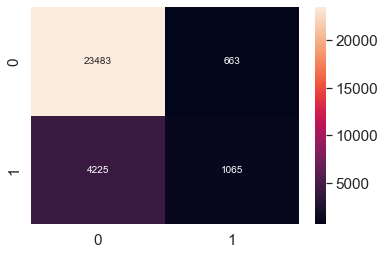

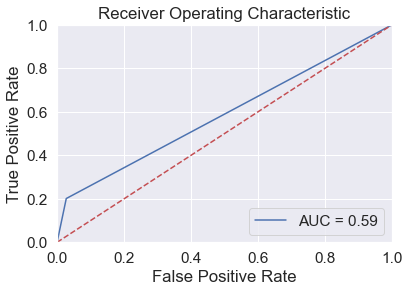

In [12]:
print(metrics.classification_report(y_test, y_pred))
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

In [6]:
X_train_3common = pd.read_pickle('X_train_3common.pkl')

In [7]:
y_train_3common = pd.read_pickle('y_train_3common.pkl')
#X_common = train_3common[]

In [8]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [9]:
#trying diff params 
param_grid = {
    "max_depth": [3, 5, 10, 15],
    "learning_rate": [0.1, 0.01, 0.7, 0.3, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [10]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search (similar to step in r)
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="f1")


In [11]:

# Fit
_ = grid_cv.fit(X_train_3common, y_train_3common)

MemoryError: Unable to allocate 1.03 GiB for an array with shape (20001, 6885) and data type int64